<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2025<br>
<font color=3C99D size=5>
Practical Assignment 1 - Search <br>
<font color=696880 size=4>
Amir Homayoon sharifi zade

____________

In [1]:
#insert your information
NAME = 'Kiarash Sanei'
STUDENT_NUMBER = '402106156'

# Libraries

In [2]:
import random
import heapq
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque
import time
from itertools import combinations

# **Uninformed Search**

In this part you are going to implement the famous algorithms of graph search on some random graph.
At first you will implement DFS, after that BFS will be implemented and finally you'll implement some heuristic and preform A*.
Here are some helper functions to generate and plot the graph. Do not touch the code in the below cells and only complete the parts with a TODO hashtag.

In [3]:
# Create a random graph with blocked edges (None means blocked)
def generate_random_graph(n, edge_probability=0.1, max_weight=10):
    graph = {i: {} for i in range(n)}
    for node in range(n):
        for neighbor in range(node + 1, n):
            if random.random() < edge_probability:  # Edge exists with given probability
                weight = random.randint(1, max_weight)
                graph[node][neighbor] = weight
                graph[neighbor][node] = weight
    return graph

In [4]:
def plot_graph(graph, path=None, explored=None):
    # Create a fixed layout using networkx's spring layout (force-directed)
    G = nx.Graph(graph)

    # Fixed layout (positions determined from the graph)
    pos = nx.spring_layout(G, seed=42)  # Ensures the same layout every time

    # Draw edges
    fig, ax = plt.subplots(figsize=(8, 8))
    nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray', width=1.5)  # Draw all edges in gray

    # Draw nodes (default color for non-explored and non-path nodes)
    nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightgreen', label="Nodes")

    # Highlight the explored nodes
    if explored:
        nx.draw_networkx_nodes(G, pos, nodelist=explored, node_size=300, node_color='blue', label="Explored")

    # Highlight the path nodes
    if path:
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_size=300, node_color='red', label="Path")

    # Add labels for the nodes
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', font_color='black')

    # Add the legend
    ax.legend()

    ax.set_title("Graph Visualization")
    plt.axis('off')  # Turn off the axis for a cleaner visualization
    plt.show()


# DFS

In [5]:
def dfs(graph, start, goal):
    # Stack for DFS
    stack = [(start, [start])]
    # Set to keep track of visited nodes
    visited = set()
    # List to keep track of all explored nodes (in order)
    explored = []

    while stack:
        # Pop current node and path from stack
        current, path = stack.pop()

        # Add current node to explored list if not already visited
        if current not in visited:
            explored.append(current)
            visited.add(current)

            # Goal check
            if current == goal:
                return path, explored

            # Add neighbors to stack in reverse order (to explore right to left)
            # This is because stack is LIFO
            neighbors = sorted(graph[current].keys(), reverse=True)
            for neighbor in neighbors:
                if neighbor not in visited:
                    # Push the neighbor and new path to the stack
                    new_path = path + [neighbor]
                    stack.append((neighbor, new_path))

    # If no path is found
    return [], explored


# BFS

In [6]:
def bfs(graph, start, goal):
    # Queue for BFS
    queue = deque([(start, [start])])
    # Set to keep track of visited nodes
    visited = set([start])
    # List to keep track of all explored nodes (in order)
    explored = [start]

    while queue:
        # Pop current node and path from queue
        current, path = queue.popleft()

        # Goal check
        if current == goal:
            return path, explored

        # Add neighbors to queue
        for neighbor in graph[current]:
            if neighbor not in visited:
                visited.add(neighbor)
                explored.append(neighbor)
                new_path = path + [neighbor]
                queue.append((neighbor, new_path))

    # If no path is found
    return [], explored


**So far, we have explored two uninformed search methods: DFS, BFS. Briefly explain the advantages and disadvantages of each method in the context of the Maze Problem and compare their performance based on your observations (consider both time and memory).**

# Depth-First Search (DFS)
- Advantages:
  + Memory Efficiency: DFS typically requires less memory as it only needs to store the current path and unexplored branches.
  + Quick Solution Finding: If the maze has many solutions or the goal is deep in the maze, DFS might find a solution faster by going deep quickly.
  + Space Complexity: O(d) where d is the maximum depth of the search tree, making it more memory-efficient for deep mazes.
  - Disadvantages:
  + Not Optimal: DFS doesn't guarantee the shortest path in a maze.
  + Can Get Stuck: In large or infinite mazes, DFS might explore very deep paths before finding a solution or may get stuck in loops.
  + Performance Variability: DFS performance depends on the goal location and maze structure.

# Breadth-First Search (BFS)
- Advantages:
  + Optimality: BFS guarantees the shortest path in terms of the number of steps.(Not in term of path cost)
  + Completeness: If a solution exists, BFS will definitely find it.
  + Predictable Performance: Performance is more consistent regardless of goal location.
- Disadvantages:
  + Memory Intensive: BFS stores all nodes at the current level before proceeding deeper, consuming significantly more memory in wide mazes.
  + Slower for Deep Goals: If the goal is deep in the maze, BFS will explore many irrelevant paths at shallower levels first.
  + Space Complexity: O(b^d) where b is the branching factor and d is the depth of the goal, making it memory-intensive for wide mazes.

# Performance Comparison
- Time Performance:
  + In mazes with solutions near the start, BFS typically performs better.
  + In mazes with deep solutions or many dead ends at shallow depths, DFS may find a solution faster.
  + BFS execution time grows more consistently with maze size, while DFS time can vary dramatically.
- Memory Usage:
  + DFS uses significantly less memory, especially in large mazes.
  + BFS memory usage grows exponentially with maze width and depth.
  + In practical implementations, BFS might run out of memory before DFS for very large mazes.

# A star


In [9]:
# Define heuristic functions
# A* Search (using simple heuristics: Manhattan distance or random)
def manhattan_distance(a, b, pos):
    # Manhattan distance is the sum of absolute differences in x and y coordinates
    x1, y1 = pos[a]
    x2, y2 = pos[b]
    return abs(x1 - x2) + abs(y1 - y2)

# Random heuristic
def random_heuristic(a, b, pos):
    return random.randint(1, 10)  # Random heuristic for demonstration

def a_star(graph, start, goal, heuristic, pos):
    # Priority queue for A* (cost, node, path)
    open_set = [(0, start, [start])]
    heapq.heapify(open_set)

    # Dictionary to store g_scores (cost from start to node)
    g_score = {start: 0}

    # Set to keep track of visited nodes
    closed_set = set()

    # List to track explored nodes in order
    explored = []

    while open_set:
        # Get the node with lowest f_score (priority)
        f, current, path = heapq.heappop(open_set)

        # If we've already processed this node, skip
        if current in closed_set:
            continue

        # Add to explored and closed set
        explored.append(current)
        closed_set.add(current)

        # Goal check
        if current == goal:
            return path, explored

        # Check all neighbors
        for neighbor in graph[current]:
            # Skip if already processed
            if neighbor in closed_set:
                continue

            # Calculate tentative g_score (cost from start to neighbor through current)
            tentative_g = g_score[current] + graph[current][neighbor]

            # If this path to neighbor is better than any previous one
            if neighbor not in g_score or tentative_g < g_score[neighbor]:
                # Update g_score
                g_score[neighbor] = tentative_g

                # Calculate f_score = g_score + heuristic
                f_score = tentative_g + heuristic(neighbor, goal, pos)

                # Add to open set
                new_path = path + [neighbor]
                heapq.heappush(open_set, (f_score, neighbor, new_path))

    # If no path is found
    return [], explored


# Results

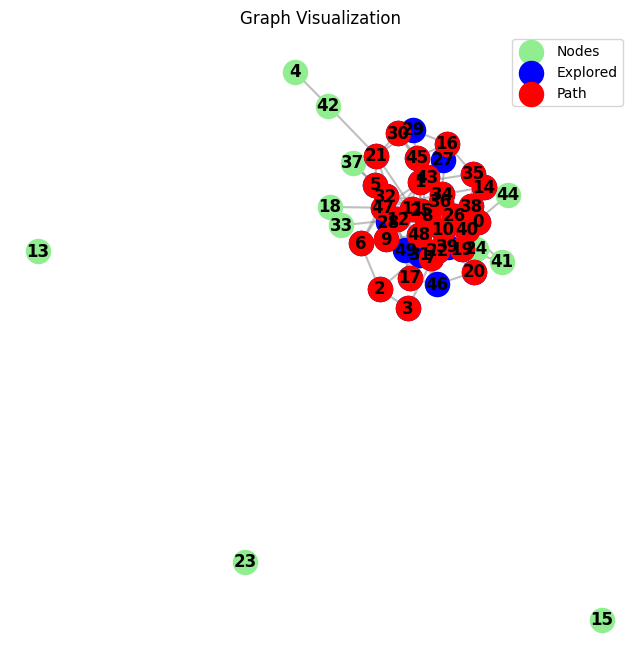

DFS Path: [0, 20, 19, 11, 7, 8, 5, 21, 12, 17, 22, 3, 2, 6, 32, 25, 1, 26, 14, 34, 47, 9, 48, 36, 16, 35, 38, 40, 10, 43, 30, 45]


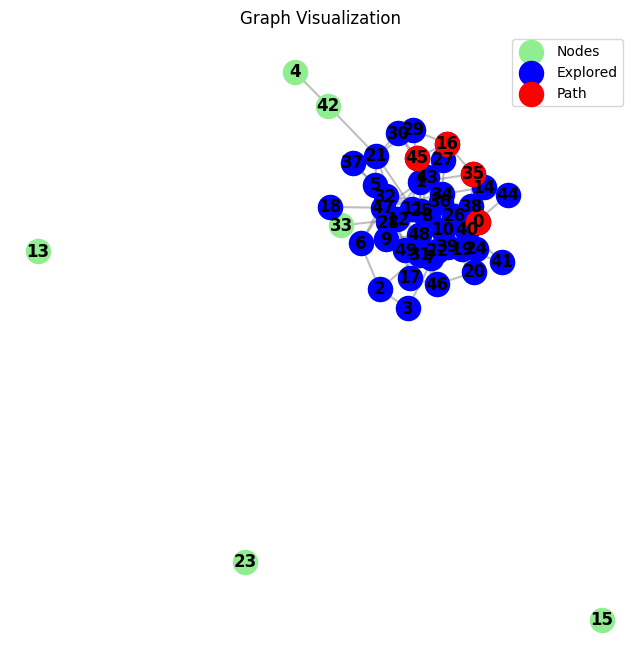

BFS Path: [0, 35, 16, 45]


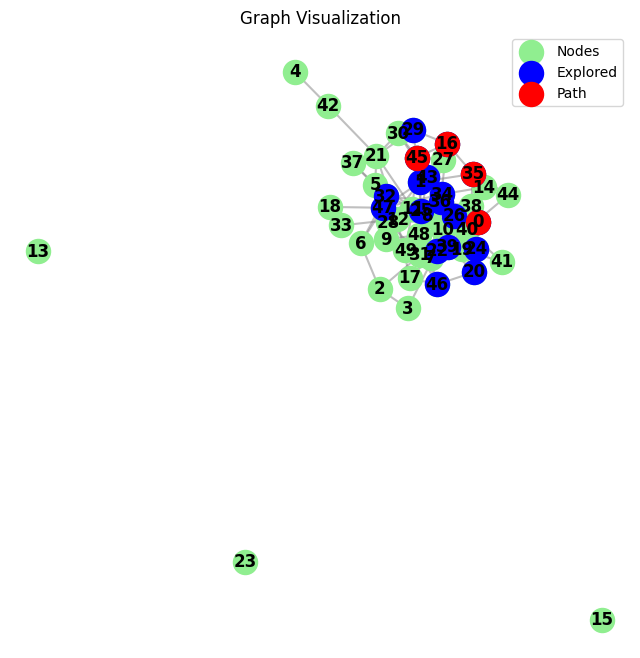

A* Path with Random Heuristic: [0, 35, 16, 45]


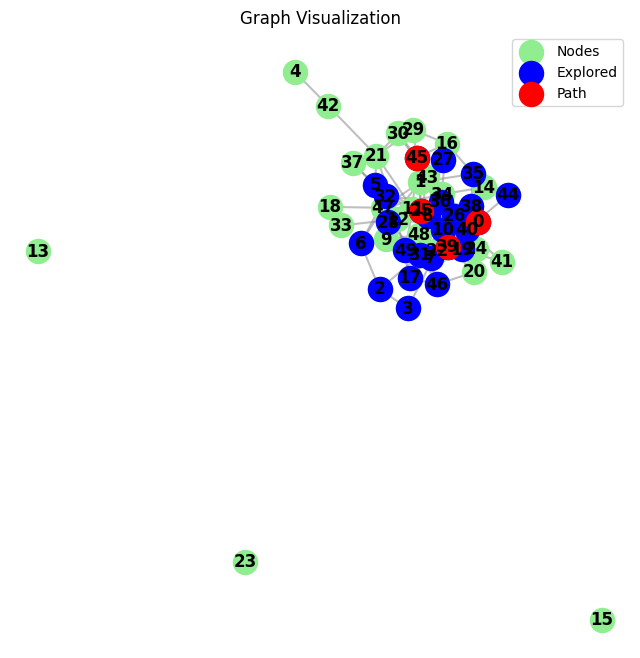

A* Path with Manhattan Distance Heuristic: [0, 39, 25, 45]


In [8]:
# Parameters
num_nodes = 50  # Number of nodes in the graph
start_node = 0  # Starting node
goal_node = 45   # Goal node

# Generate random graph
random_graph = generate_random_graph(num_nodes)

# Get random node positions for Manhattan distance calculation
positions = {i: (random.randint(0, 100), random.randint(0, 100)) for i in range(num_nodes)}

# Run DFS
path_dfs, explored_dfs = dfs(random_graph, start_node, goal_node)
plot_graph(random_graph, path=path_dfs, explored=explored_dfs)
print(f"DFS Path: {path_dfs}")

# Run BFS
path_bfs, explored_bfs = bfs(random_graph, start_node, goal_node)
plot_graph(random_graph, path=path_bfs, explored=explored_bfs)
print(f"BFS Path: {path_bfs}")

# Run A* with Random Heuristic in same manner as above
path_a_star_random, explored_a_star_random = a_star(random_graph, start_node, goal_node, random_heuristic,positions)
plot_graph(random_graph, path=path_a_star_random, explored=explored_a_star_random)
print(f"A* Path with Random Heuristic: {path_a_star_random}")

# Run A* with Manhattan Distance Heuristic
path_a_star_manhattan, explored_a_star_manhattan = a_star(random_graph, start_node, goal_node, manhattan_distance ,positions)
plot_graph(random_graph, path=path_a_star_manhattan, explored=explored_a_star_manhattan)
print(f"A* Path with Manhattan Distance Heuristic: {path_a_star_manhattan}")


**Explain your heuristic and observation's result. Also, compare the A\* method with Uninformed search in the context of the problem.**

# Heuristic Explanation
- Manhattan Distance Heuristic:
  + The Manhattan distance heuristic calculates the sum of absolute differences between the x and y coordinates of two nodes.
  + It represents the shortest possible path length in a grid where movement is restricted to horizontal and vertical directions.
  + It is admissible, which guarantees optimal solutions.
  + It provides more informed guidance than the random heuristic by considering position informations.

- Random Heuristic:
  + The random heuristic assigns random values between 1-10 without considering the actual problem space. This demonstrates how A* behaves with a non-informative and inadmissible heuristic.
  + It make A* to behave like UCS. (Non-informative)

# Observations from Results
- Exploration Efficiency:
  + DFS explored deep paths first, exploring many unnecessary nodes
  + BFS explored nodes in breadth-first order, guaranteeing the shortest path but exploring many unnecessary nodes
  + A* with Manhattan distance was more focused, exploring fewer nodes in the direction of the goal
  + A* with random heuristic showed less focused exploration than Manhattan but more focused than uninformed methods
- Path Quality:
  + DFS found a valid but longer path
  + BFS found the shortest path in terms of the number of nodes
  + A* with Manhattan distance found a path of comparable quality to BFS
  + A* with random heuristic found a valid path but not optimal
- Performance:
  + The explored sets reveal that A* with Manhattan distance explored fewer nodes than BFS and DFS to find a solution
  + The random heuristic exploration pattern was less efficient than Manhattan but still more focused than uninformed search

# Comparison with Uninformed Search
- A* vs. DFS:
  + Optimality: A* guarantees the optimal path (with admissible heuristics), while DFS does not
  + Exploration: A* explores more promising paths first, whereas DFS explores deep paths regardless of their promise. So A* explores less nodes.
  + Memory Usage: DFS uses less memory, but A* makes better use of its memory by prioritizing promising paths
  + Speed: A* typically finds solutions faster than DFS for well-designed heuristics
- A vs. BFS:*
  + Optimality: Both guarantee optimal solutions (A* when using admissible heuristics)
  + Efficiency: A* is more efficient, exploring fewer nodes by using heuristic information
  + Memory Usage: A* often requires less memory than BFS because it doesn't need to store all nodes at each level
  + Direction: A* search is directed toward the goal, while BFS spreads out equally in all directions

# **Weigted Graph**

In this part we are going to explore a situation in which every vertice has some cost and we want to minimize the cost as well. So one can say that the part before was a special kind of Weighted Graph with weights equal to 1 in every vertice.
Again the two cells below are helper functions that should not be modified.

In [11]:
# Create a random graph with weights on edges
def generate_weighted_graph(n, edge_probability=0.1, max_weight=10):
    graph = {i: {} for i in range(n)}

    for node in range(n):
        for neighbor in range(node + 1, n):
            if random.random() < edge_probability:  # Edge exists with given probability
                weight = random.randint(1, max_weight)
                graph[node][neighbor] = weight
                graph[neighbor][node] = weight  # Undirected graph
    return graph


In [12]:
def plot_graph(graph, path=None, explored=None):
    # Create a fixed layout using networkx's spring layout (force-directed)
    G = nx.Graph(graph)

    # Fixed layout (positions determined from the graph)
    pos = nx.spring_layout(G, seed=42)  # Ensures the same layout every time

    # Draw edges
    fig, ax = plt.subplots(figsize=(8, 8))
    nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray', width=1.5)  # Draw all edges in gray

    # Draw nodes (default color for non-explored and non-path nodes)
    nx.draw_networkx_nodes(G, pos, node_size=300, node_color='lightgreen', label="Nodes")

    # Highlight the explored nodes
    if explored:
        nx.draw_networkx_nodes(G, pos, nodelist=explored, node_size=300, node_color='blue', label="Explored")

    # Highlight the path nodes
    if path:
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_size=300, node_color='red', label="Path")

    # Add labels for the nodes
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', font_color='black')

    # Display edge weights (weights on the edges)
    edge_labels = {(u, v): graph[u][v] for u, v in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='blue')

    # Add the legend
    ax.legend()

    ax.set_title("Graph Visualization with Weights")
    plt.axis('off')  # Turn off the axis for a cleaner visualization
    plt.show()


# DFS With Cost

In [13]:
# Depth-First Search (DFS) with weight sum
def dfs_weighted(graph, start, goal):
    # Stack for DFS: (node, path, weight_sum)
    stack = [(start, [start], 0)]
    # Set to keep track of visited nodes
    visited = set()
    # List to keep track of all explored nodes (in order)
    explored = []

    # If start and goal are the same
    if start == goal:
        return [start], 0, [start]

    while stack:
        # Pop current node, path, and weight_sum from stack
        current, path, weight_sum = stack.pop()

        # Add current node to explored list if not already visited
        if current not in visited:
            explored.append(current)
            visited.add(current)

            # Check all neighbors
            for neighbor in graph[current]:
                if neighbor not in visited:
                    # Calculate new weight sum
                    new_weight_sum = weight_sum + graph[current][neighbor]
                    # Build new path
                    new_path = path + [neighbor]

                    # Goal check
                    if neighbor == goal:
                        # Return the path, weight sum, and explored nodes
                        return new_path, new_weight_sum, explored

                    # Push the neighbor, new path, and new weight sum to the stack
                    stack.append((neighbor, new_path, new_weight_sum))

    # If no path is found
    return None, None, explored

# BFS With Cost

In [14]:
# Breadth-First Search (BFS) with weight sum
def bfs_weighted(graph, start, goal):
    # Queue for BFS: (node, path, weight_sum)
    queue = deque([(start, [start], 0)])
    # Set to keep track of visited nodes
    visited = set([start])
    # List to keep track of all explored nodes (in order)
    explored = [start]

    # If start and goal are the same
    if start == goal:
        return [start], 0, [start]

    while queue:
        # Dequeue current node, path, and weight_sum from queue
        current, path, weight_sum = queue.popleft()

        # Check all neighbors
        for neighbor in graph[current]:
            if neighbor not in visited:
                # Mark as visited
                visited.add(neighbor)
                explored.append(neighbor)

                # Calculate new weight sum
                new_weight_sum = weight_sum + graph[current][neighbor]
                # Build new path
                new_path = path + [neighbor]

                # Goal check
                if neighbor == goal:
                    # Return the path, weight sum, and explored nodes
                    return new_path, new_weight_sum, explored

                # Enqueue the neighbor, new path, and new weight sum
                queue.append((neighbor, new_path, new_weight_sum))

    # If no path is found
    return None, None, explored


# Dijkstra (UCS)

In [15]:
# Dijkstra's Algorithm
def dijkstra(graph, start, goal):
    # Priority queue for Dijkstra's: (distance, node, path)
    priority_queue = [(0, start, [start])]
    heapq.heapify(priority_queue)

    # Dictionary to store shortest distance to each node
    distances = {start: 0}

    # Set to keep track of visited/finalized nodes
    visited = set()

    # List to track explored nodes in order
    explored = []

    while priority_queue:
        # Get node with smallest distance
        current_distance, current_node, path = heapq.heappop(priority_queue)

        # If we've already processed this node, skip it
        if current_node in visited:
            continue

        # Mark as visited and add to explored list
        visited.add(current_node)
        explored.append(current_node)

        # Goal check
        if current_node == goal:
            return path, current_distance, explored

        # Check all neighbors
        for neighbor, weight in graph[current_node].items():
            if neighbor not in visited:
                # Calculate distance to neighbor through current node
                distance = current_distance + weight

                # If we found a better path to the neighbor
                if neighbor not in distances or distance < distances[neighbor]:
                    # Update distance
                    distances[neighbor] = distance
                    # Create new path
                    new_path = path + [neighbor]
                    # Add to priority queue
                    heapq.heappush(priority_queue, (distance, neighbor, new_path))

    # If no path is found
    return None, None, explored


# Results

DFS Path: [0, 47, 1, 34, 46, 33, 48, 44, 42, 49, 38, 39, 37, 16, 8, 20, 27, 32, 45]
DFS Weight Sum: 96
BFS Path: [0, 10, 15, 32, 45]
BFS Weight Sum: 18
Dijkstra Path: [0, 13, 26, 9, 45]
Dijkstra Weight Sum: 13


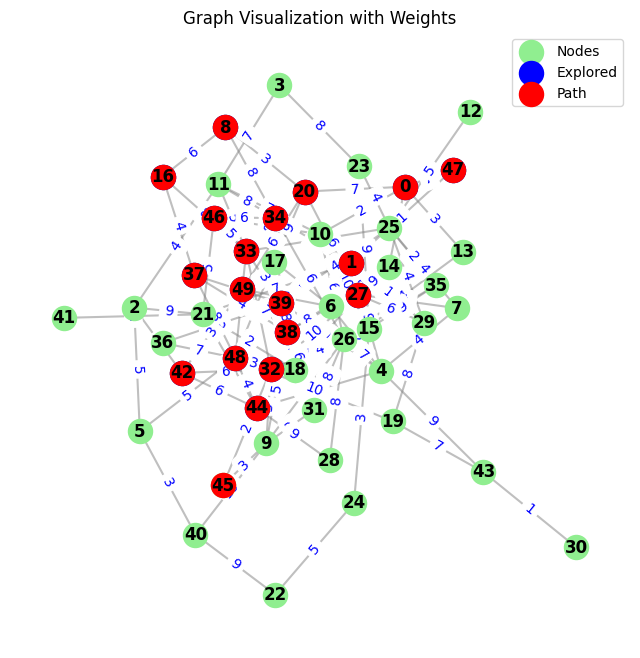

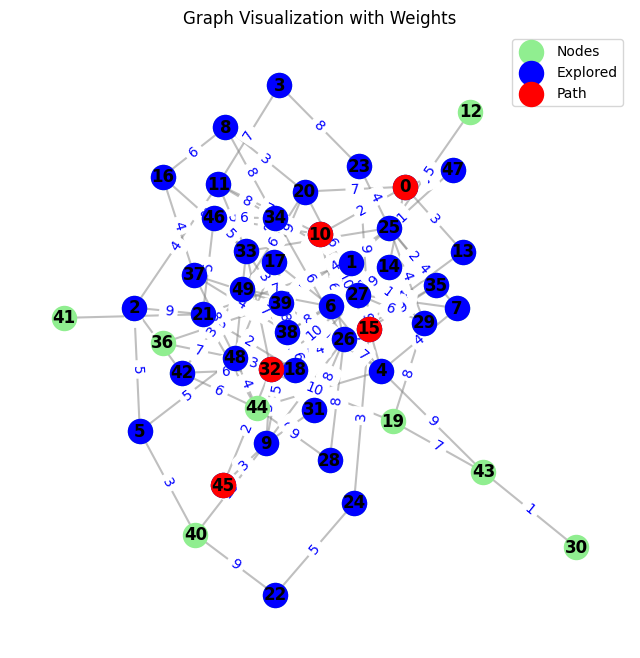

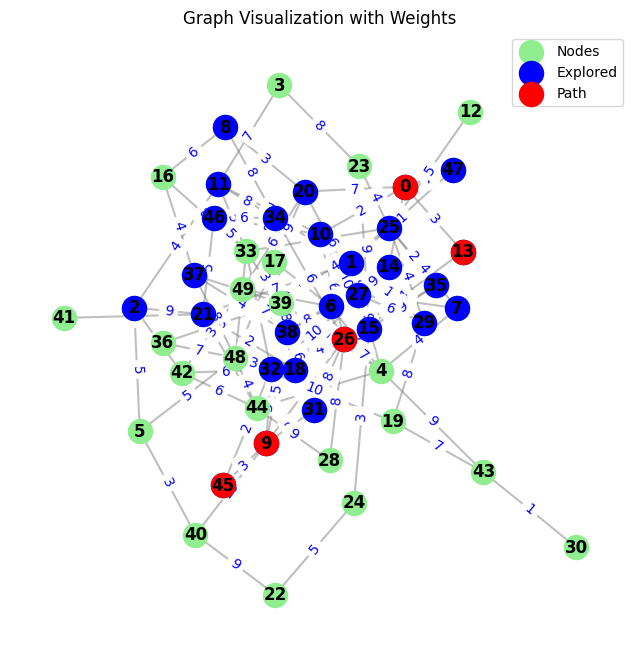

In [16]:
# Parameters
num_nodes = 50  # Number of nodes in the graph
start_node = 0  # Starting node
goal_node = 45   # Goal node

# Generate random weighted graph
weighted_graph = generate_weighted_graph(num_nodes)

# Run DFS
path_dfs, weight_dfs, explored_dfs = dfs_weighted(weighted_graph, start_node, goal_node)
print(f"DFS Path: {path_dfs}")
print(f"DFS Weight Sum: {weight_dfs}")

# Run BFS
path_bfs, weight_bfs, explored_bfs = bfs_weighted(weighted_graph, start_node, goal_node)
print(f"BFS Path: {path_bfs}")
print(f"BFS Weight Sum: {weight_bfs}")

# Run Dijkstra
path_dijkstra, weight_dijkstra, explored_dijkstra = dijkstra(weighted_graph, start_node, goal_node)
print(f"Dijkstra Path: {path_dijkstra}")
print(f"Dijkstra Weight Sum: {weight_dijkstra}")

# Visualize the results
plot_graph(weighted_graph, path=path_dfs, explored=explored_dfs)
plot_graph(weighted_graph, path=path_bfs, explored=explored_bfs)
plot_graph(weighted_graph, path=path_dijkstra, explored=explored_dijkstra)


**What are the key diffrences between dijkstra, bfs and dfs? Which one of them has acted better in our problem and why? What happens when graph is directed?**

# Comparing Dijkstra, BFS, and DFS
## Dijkstra (UCS)
  - Selection Strategy: Always selects the node with the smallest cumulative distance from the start
  - Optimality: Guarantees the shortest path by total weight
  - Completeness: Complete
  - Time Complexity: O(b ^ [C* / e])

## BFS
  - Selection Strategy: Explores nodes level by level, outward from the start
  - Optimality: Guarantees the shortest path by number of edges (not weight)
  - Completeness: Complete
  - Time Complexity: O(b ^ (d + 1))

## DFS
  - Selection Strategy: Explores as far as possible along each branch before backtracking
  - Optimality: Does not guarantee any form of shortest path
  - Completeness: Complete for finite graphs
  - Time Complexity: O(b ^ (m))

## Dijkstra's algorithm performed best
  - It specifically accounts for edge weights when selecting paths
  - It explores the most promising (lowest weight) paths first
  - It guarantees the minimum total weight path
  - BFS would find paths with the fewest edges but might miss shorter weighted paths that use more edges.
  - DFS would find valid paths quickly but with no guarantees about weight or optimality.
  
# Impact of Directed Graphs
## Dijkstra (UCS)
  - Still works correctly with minimal changes
  - Still guarantees shortest paths from start to all reachable nodes

## BFS:
  - Still works correctly for finding shortest path by number of edges
  - Exploration pattern changes as edges can only be followed in one direction

## DFS:
  - Still works for path finding but exploration pattern changes
  - May not be able to reach all nodes from a given start node
  - May get stuck
  
## Dijkstra's algorithm performed best
  - Dijkstra's would still maintain its edge in finding optimal weighted paths among reachable nodes.

# **Local Search**

# Problem definition
In this part, you should implement **Hill-Climbing** and **Genentic** algorithms. Afterwards you will test them on a formal np problem (Subset Sum)

Suppose we have a limit for our back pack that we show with *target_sum* and random number of materials with some rand weights which are present in *nums*. To do that we will implement 3 algorithms. First, you should implement  **Hill-Climbing**, and then you should implement the **Genetic Algorithm**. At last, you should find the actual answer using **Naive Search (brute force)**.

In [17]:
# Sample input for Subset Sum Problem
target_sum = 60
nums = [random.randint(1, 10) for _ in range(15)]  # Random list of 15 integers between 1 and 10

print(f"Numbers: {nums}")
print(f"Target Sum: {target_sum}")


Numbers: [5, 3, 5, 5, 9, 2, 1, 6, 1, 2, 9, 7, 3, 1, 3]
Target Sum: 60


# Hill Climbing

In order to implement hill climbing, you must at first define the neighbors in your model. We suggest that every addition or omition of your current bag should be a neighbor yet you can implement it how you want.

In [18]:
def hill_climbing(nums, target_sum):
    # Random initial solution (subset of nums)
    current_solution = random.sample(nums, random.randint(1, len(nums)))
    current_sum = sum(current_solution)
    current_fitness = abs(target_sum - current_sum)  # Fitness is how close we are to target

    # Track iterations for potential early stopping
    iterations = 0
    max_iterations = 1000

    # Hill climbing loop
    while iterations < max_iterations:
        iterations += 1

        # Track if we found any improvements in this iteration
        found_improvement = False

        # Generate neighbors by adding/removing one element
        for num in nums:
            # Try adding an element (if not already in solution)
            if num not in current_solution:
                neighbor = current_solution + [num]
                neighbor_sum = sum(neighbor)
                neighbor_fitness = abs(target_sum - neighbor_sum)

                # If this neighbor is better, move to it
                if neighbor_fitness < current_fitness:
                    current_solution = neighbor
                    current_sum = neighbor_sum
                    current_fitness = neighbor_fitness
                    found_improvement = True

                    # If we found exact solution, return immediately
                    if current_fitness == 0:
                        return current_solution

            # Try removing an element (if it's in the solution)
            if num in current_solution:
                neighbor = current_solution.copy()
                neighbor.remove(num)

                # Don't consider empty solutions
                if not neighbor:
                    continue

                neighbor_sum = sum(neighbor)
                neighbor_fitness = abs(target_sum - neighbor_sum)

                # If this neighbor is better, move to it
                if neighbor_fitness < current_fitness:
                    current_solution = neighbor
                    current_sum = neighbor_sum
                    current_fitness = neighbor_fitness
                    found_improvement = True

                    # If we found exact solution, return immediately
                    if current_fitness == 0:
                        return current_solution

        # If no improvement was found in this iteration, we've reached a local optimum
        if not found_improvement:
            break

    return current_solution



# Genetic Algorithm
As you have learned, in order to implement GA, you need to define mutation function and crossover functions(single pointed one would be enough).

Then, in main GA body, a population of random solutions (subsets) is created. These solutions evolve over a number of generations through selection, crossover, and mutation.
The algorithm aims to evolve the population towards finding a subset whose sum is as close as possible to the target sum. After a set number of generations, the algorithm returns the best solution found.

In [19]:
def tournament_selection(population, target_sum, tournament_size=5):
    tournament = random.sample(population, tournament_size)
    tournament.sort(key=lambda x: abs(target_sum - sum(x)))
    return tournament[0]  # Best solution in the tournament

def crossover(parent1, parent2):
    # Check if parents are empty or too small for crossover
    if not parent1 or not parent2:
        return parent1.copy(), parent2.copy()

    # Find the shorter parent's length
    min_length = min(len(parent1), len(parent2))

    # If either parent has only one element, special handling needed
    if min_length <= 1:
        return parent1.copy(), parent2.copy()

    # Choose a random crossover point
    crossover_point = random.randint(1, min_length - 1)

    # Create children using single-point crossover
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]

    # Remove duplicates while preserving order
    child1 = list(dict.fromkeys(child1))
    child2 = list(dict.fromkeys(child2))

    return child1, child2

def mutate(solution, nums, mutation_rate=0.1):
    # Create a copy to avoid modifying the original
    mutated = solution.copy()

    # Mutation type 1: Add a random element from nums that isn't in the solution
    if random.random() < mutation_rate:
        available_nums = [num for num in nums if num not in mutated]
        if available_nums:
            mutated.append(random.choice(available_nums))

    # Mutation type 2: Remove a random element from the solution
    if random.random() < mutation_rate and mutated:  # Make sure solution isn't empty
        random_index = random.randint(0, len(mutated) - 1)
        mutated.pop(random_index)

    # Check that we don't end up with an empty solution
    if not mutated and nums:
        mutated = [random.choice(nums)]

    return mutated

In [21]:
def genetic_algorithm(nums, target_sum, population_size=50, generations=100, mutation_rate=0.1):
    # Random initial population
    population = [random.sample(nums, random.randint(1, len(nums))) for _ in range(population_size)]

    # Track the best solution found
    best_solution = None
    best_fitness = float('inf')

    # Evolution over generations
    for generation in range(generations):
        # Evaluate current population
        population.sort(key=lambda x: abs(target_sum - sum(x)))
        current_best = population[0]
        current_best_fitness = abs(target_sum - sum(current_best))

        # Update overall best if we found a better solution
        if current_best_fitness < best_fitness:
            best_solution = current_best
            best_fitness = current_best_fitness

        # If we found an exact match, return it immediately
        if best_fitness == 0:
            return best_solution

        # Create the next generation
        next_generation = []

        # Elitism: keep the best solutions
        elite_count = max(1, population_size // 10)  # Keep top 10%
        next_generation.extend(population[:elite_count])

        # Fill the rest of the population with children
        while len(next_generation) < population_size:
            # Tournament selection for parents
            parent1 = tournament_selection(population, target_sum)
            parent2 = tournament_selection(population, target_sum)

            # Crossover
            child1, child2 = crossover(parent1, parent2)

            # Mutation
            child1 = mutate(child1, nums, mutation_rate)
            child2 = mutate(child2, nums, mutation_rate)

            # Add children to next generation
            next_generation.append(child1)
            if len(next_generation) < population_size:
                next_generation.append(child2)

        # Update population with the new generation
        population = next_generation

    # Sort the final population by fitness
    population.sort(key=lambda x: abs(target_sum - sum(x)))

    # Return the best solution found
    return population[0]

# Brute Force

In [20]:
def brute_force(nums, target_sum):
    n = len(nums)
    best_subset = []
    best_difference = float('inf')

    # Generate all possible subsets (2^n possibilities)
    for mask in range(1, 2**n):  # Start from 1 to avoid empty subset
        subset = []
        for i in range(n):
            if (mask >> i) & 1:  # Check if ith bit is set
                subset.append(nums[i])

        # Calculate the sum and difference from target
        current_sum = sum(subset)
        current_difference = abs(target_sum - current_sum)

        # Update if this is better than our current best
        if current_difference < best_difference:
            best_difference = current_difference
            best_subset = subset

            # If we found an exact match, return immediately
            if best_difference == 0:
                return best_subset

    return best_subset

# Comparison

Run the 3 algorithms 10 times and watch the result. Hill climbing and Genetic Algorithm results should be close to actual answers(brute force results).


In [22]:
# Running the algorithms multiple times with different random setups
def run_multiple_trials(num_trials=10):
    hill_climbing_times = []
    ga_times = []
    brute_force_times = []

    hill_climbing_solutions = []
    ga_solutions = []
    brute_force_solutions = []

    for i in range(num_trials):
        # Generate random setup for each trial
        target_sum = random.randint(50, 100)  # Random target sum between 10 and 50
        nums = [random.randint(1, 10) for _ in range(random.randint(10, 30))]  # Random list size between 10 and 20
        hill_climb_sum = 0
        genetic_sum = 0
        brute_force_sum = 0
        # Print the current trial setup
        print(f"Trial {i + 1}: Target Sum = {target_sum}, Numbers = {nums}")

        # Hill Climbing
        start_time = time.time()
        hill_climb_result = hill_climbing(nums, target_sum)
        hill_climb_time = time.time() - start_time
        hill_climbing_times.append(hill_climb_time)
        hill_climbing_solutions.append(hill_climb_result)
        hill_climb_sum = sum(hill_climb_result)

        # Genetic Algorithm
        start_time = time.time()
        ga_result = genetic_algorithm(nums, target_sum)
        ga_time = time.time() - start_time
        ga_times.append(ga_time)
        ga_solutions.append(ga_result)
        genetic_sum = sum(ga_result)

        # Brute Force
        start_time = time.time()
        brute_force_result = brute_force(nums, target_sum)
        brute_force_time = time.time() - start_time
        brute_force_times.append(brute_force_time)
        brute_force_solutions.append(brute_force_result)
        brute_force_sum = sum(brute_force_result) if brute_force_result else 0

        # Print each trial result
        print(f"Hill Climbing Result: {hill_climb_result}, final sum: {hill_climb_sum}, Time Taken: {hill_climb_time:.4f} seconds")
        print(f"Genetic Algorithm Result: {ga_result}, final sum: {genetic_sum}, Time Taken: {ga_time:.4f} seconds")
        print(f"Brute Force Result: {brute_force_result}, final sum: {brute_force_sum}, Time Taken: {brute_force_time:.4f} seconds\n")

    # Calculate average times
    avg_hill_climbing_time = sum(hill_climbing_times) / num_trials
    avg_ga_time = sum(ga_times) / num_trials
    avg_brute_force_time = sum(brute_force_times) / num_trials

    print("\nAverage Times over 10 Trials:")
    print(f"Hill Climbing Average Time: {avg_hill_climbing_time:.4f} seconds")
    print(f"Genetic Algorithm Average Time: {avg_ga_time:.4f} seconds")
    print(f"Brute Force Average Time: {avg_brute_force_time:.4f} seconds")

# Run the comparison with 10 trials
run_multiple_trials(num_trials=10)


Trial 1: Target Sum = 88, Numbers = [9, 5, 1, 3, 6, 5, 10, 6, 1, 1, 9, 2, 6, 6, 8, 4, 4, 5, 2, 8, 1, 2]
Hill Climbing Result: [1, 2, 1, 3, 8, 6, 6, 8, 2, 10, 6, 9, 6, 5, 1, 4, 1, 5, 2], final sum: 86, Time Taken: 0.0002 seconds
Genetic Algorithm Result: [2, 5, 6, 4, 10, 8, 1, 1, 4, 8, 9, 5, 1, 9, 2, 6, 6], final sum: 87, Time Taken: 0.0607 seconds
Brute Force Result: [9, 5, 1, 3, 6, 5, 10, 6, 1, 9, 6, 6, 8, 4, 4, 5], final sum: 88, Time Taken: 0.7890 seconds

Trial 2: Target Sum = 63, Numbers = [5, 8, 4, 9, 2, 3, 2, 8, 7, 6, 4, 8, 3, 5, 8]
Hill Climbing Result: [3, 6, 5, 8, 7, 8, 3, 9, 4, 8, 2], final sum: 63, Time Taken: 0.0000 seconds
Genetic Algorithm Result: [4, 9, 6, 8, 5, 8, 3, 7, 4, 8], final sum: 62, Time Taken: 0.0323 seconds
Brute Force Result: [5, 8, 4, 9, 2, 2, 8, 7, 6, 4, 8], final sum: 63, Time Taken: 0.0056 seconds

Trial 3: Target Sum = 71, Numbers = [4, 10, 9, 5, 10, 5, 8, 9, 9, 7, 8, 7, 7, 3]
Hill Climbing Result: [9, 5, 5, 4, 10, 7, 7, 8, 3], final sum: 58, Time Take

**Now Compare and contrast the performance of brute-force search, hill climbing, and genetic algorithms in Problems. Discuss the strengths and weaknesses of each approach in this context, and explain when each algorithm might be preferred over the others.**


# Brute Force Search
  - Strengths:
    + Guarantees the optimal solution
    + Simple to implement and understand
    + Deterministic results (same input always produces same output)
    + No parameters to tune
  - Weaknesses:
    + Exponential time complexity O(2^n)
    + Memory usage can be significant when generating all subsets
  - When to Prefer:
    + When the problem size is small (n < 20)
    + When optimality is absolutely required

# Hill Climbing
  - Strengths:
    + Very fast execution (typically O(n²) or better in practice)
    + Minimal memory requirements
    + Simple to implement
    + Finds reasonably good solutions quickly
  - Weaknesses:
    + Easily gets stuck in local optima
    + Result quality highly dependent on initial random solution
    + No guarantee of optimality
    + Performance varies significantly between runs
  - When to Prefer:
    + When computation time is severely limited
    + When a "good enough" solution is acceptable

# Genetic Algorithm
  - Strengths:
    + Effectively explores large search spaces
    + More robust against local optima than hill climbing
    + Improves solution quality over time
  - Weaknesses:
    + More complex to implement and tune
    + Requires more computation than hill climbing
    + Stochastic nature means results vary between runs
    + May converge slowly for certain problem configurations
  - When to Prefer:
    + When robustness against local optima is important

# Subset Sum Problem
  - Small instances (n ≤ 20):
    + Brute force is preferred for guaranteed optimality
    + Hill climbing may find good solutions fastest but might miss optimal ones
    + Genetic algorithms would be overkill
  - Medium instances (20 < n < 100):
    + Brute force becomes computationally infeasible
    + Hill climbing with multiple restarts offers a good balance
    + Genetic algorithms will generally find better solutions given enough generations
  - Large instances (n ≥ 100):
    + Neither brute force nor basic hill climbing is feasible
    + Genetic algorithms typically outperform hill climbing